# Bike-sharing Case Study (Multiple Linear Regression)

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bike
- How well those variables describe the bike demand

## Goals:
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


##  Steps to solve the problem
 1. Reading, understanding and visualising the data
 2. Preparing the data for modelling
 3. Training the model
 4. Residual analysis
 5. Predictions and evaluations

## 1. Reading, understanding and visualising the data

In [4]:
# Importing required libraries

# Data manipulation libraries
import pandas as pd
import numpy as np 

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

# Statistical modeling and hypothesis testing libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Warnings library to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the given data by using Panda library's read method
bike_dataframe = pd.read_csv("day.csv")

In [6]:
# Displaying the first 5 rows of the DataFrame
print(bike_dataframe.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [7]:
# checking the shape of dataframe
print(bike_dataframe.shape)

(730, 16)


In [8]:
# Displaying a concise summary of the DataFrame
print(bike_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [9]:
# Describing the dataframe (describe provides statistical summary of the numerical columns in the dataframe)
print(bike_dataframe.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [10]:
# Displaying Data types of each column
print(bike_dataframe.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [11]:
# Displaying the columns in the dataframe
print(bike_dataframe.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


#### Check for null values

In [12]:
# Count the number of missing (null or NaN) values in each column for the dataframe.
print(bike_dataframe.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Checking missing values

In [13]:
# Displaying column and Percentage of missing values for each column having missing values and the number of columns

# Only Columns with missing (null or NaN) values in the dataframe.
null_columns = bike_dataframe.columns[bike_dataframe.isnull().any()]

# Calculate sum of null values for each column containing null values
null_counts = bike_dataframe[null_columns].isnull().sum()

total_rows = len(bike_dataframe)
null_percentages = (null_counts / total_rows) * 100
print("\nPercentage of missing values for each column:")
print(null_percentages)

# Displaying the number of Columns with missing (null or NaN) values >=50 in the dataframe.
print("\n Total number of columns having missing values >= 50 :")
print(len(null_percentages[null_percentages >= 50]))


Percentage of missing values for each column:
Series([], dtype: float64)

 Total number of columns having missing values >= 50 :
0


In [14]:
# Displaying Data types of each column
print(bike_dataframe.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [15]:
# Now lets Count the number of missing values in across the rows
missing_values_per_row = bike_dataframe.isnull().sum(axis=1).max()

print(missing_values_per_row)

0


### Findings:
- Dataframe has 730 rows and 16 columns
- One column is Object and rest is either float or Int datatypes
- There are no missing or null values either in columns or rows
- No column has single unique value

### Removing Duplicates

In [16]:
# Removing duplicate rows in the dataframe

# Shape of the dataframe before removing duplicate rows
print(bike_dataframe.shape)

daydf = bike_dataframe.drop_duplicates()

# Shape of the dataframe after removing duplicate rows
print(bike_dataframe.shape)

(730, 16)
(730, 16)


### Shape is same as before and after removing the duplicates. So we can say that there are no duplicate rows found in the dataframe.

### Removing unwanted columns

In [17]:
# 1. Removing below as it has unique identifier for each row and does not provide any informative value about the data itself

# instant

# 2. Removing below as it has the date but we already have seperate columns 'yr' and 'mnth' for the same.

# dteday

# 3. Removing below as both the columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we can remove these columns

# casual
# registered

In [18]:
# Dropping unwanted columns
bike_dataframe.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [19]:
# Displaying the info after removing unwanted columns
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Renaming a few columns for better readibility

In [20]:
# Renaming columns: 'yr', 'mnth', 'temp', 'atemp', 'hum' columns to 'year', 'month', 'temperature', 'feelingtemperature', 'humidity'

bike_dataframe.rename(columns={'yr':'year','mnth':'month','temp':'temperature', 'atemp':'feelingtemperature','hum':'humidity'}, inplace=True)

In [21]:
# Displaying the info after removing unwanted columns
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              730 non-null    int64  
 1   year                730 non-null    int64  
 2   month               730 non-null    int64  
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    int64  
 5   workingday          730 non-null    int64  
 6   weathersit          730 non-null    int64  
 7   temperature         730 non-null    float64
 8   feelingtemperature  730 non-null    float64
 9   humidity            730 non-null    float64
 10  windspeed           730 non-null    float64
 11  cnt                 730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [22]:
# Displaying the head of the dataframe
bike_dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handling outliers

In [23]:
# Now lets check column with unique value with default sort "ascending"
unique_value_counts = bike_dataframe.nunique().sort_values()
print(unique_value_counts)

year                    2
holiday                 2
workingday              2
weathersit              3
season                  4
weekday                 7
month                  12
temperature           498
humidity              594
windspeed             649
feelingtemperature    689
cnt                   695
dtype: int64


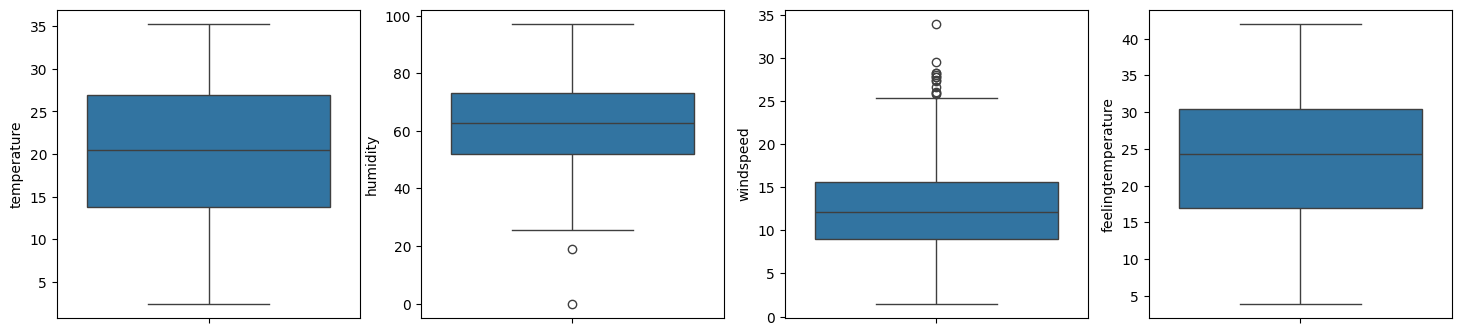

In [24]:
cols = ['temperature', 'humidity', 'windspeed', 'feelingtemperature']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_dataframe)
    i+=1

### There seems to be no Outliers in 'temperature', 'humidity', 'windspeed', 'feelingtemperature' columns

### Mapping some of the column values to be more meaningful

In [25]:
# Mapping the season column

bike_dataframe.season = bike_dataframe.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [26]:
# Encoding/mapping the month column

bike_dataframe.month = bike_dataframe.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [27]:
# Encoding/mapping the weekday column

bike_dataframe.weekday = bike_dataframe.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [28]:
# Encoding/mapping the weathersit column

bike_dataframe.weathersit = bike_dataframe.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [29]:
# Displaying the head of the dataframe
bike_dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# Displaying the info after removing unwanted columns
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              730 non-null    object 
 1   year                730 non-null    int64  
 2   month               730 non-null    object 
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    object 
 5   workingday          730 non-null    int64  
 6   weathersit          730 non-null    object 
 7   temperature         730 non-null    float64
 8   feelingtemperature  730 non-null    float64
 9   humidity            730 non-null    float64
 10  windspeed           730 non-null    float64
 11  cnt                 730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Convert to 'category' data type

In [31]:
# Convert to 'category' data type

bike_dataframe['season'] = bike_dataframe['season'].astype('category')
bike_dataframe['month'] = bike_dataframe['month'].astype('category')
bike_dataframe['weekday'] = bike_dataframe['weekday'].astype('category')
bike_dataframe['weathersit'] = bike_dataframe['weathersit'].astype('category')

In [32]:
# Displaying the info after removing unwanted columns
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   season              730 non-null    category
 1   year                730 non-null    int64   
 2   month               730 non-null    category
 3   holiday             730 non-null    int64   
 4   weekday             730 non-null    category
 5   workingday          730 non-null    int64   
 6   weathersit          730 non-null    category
 7   temperature         730 non-null    float64 
 8   feelingtemperature  730 non-null    float64 
 9   humidity            730 non-null    float64 
 10  windspeed           730 non-null    float64 
 11  cnt                 730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Visualising the Data

### Drawing pairplots to check for linear relationship for Numerical columns

<Figure size 1000x1000 with 0 Axes>

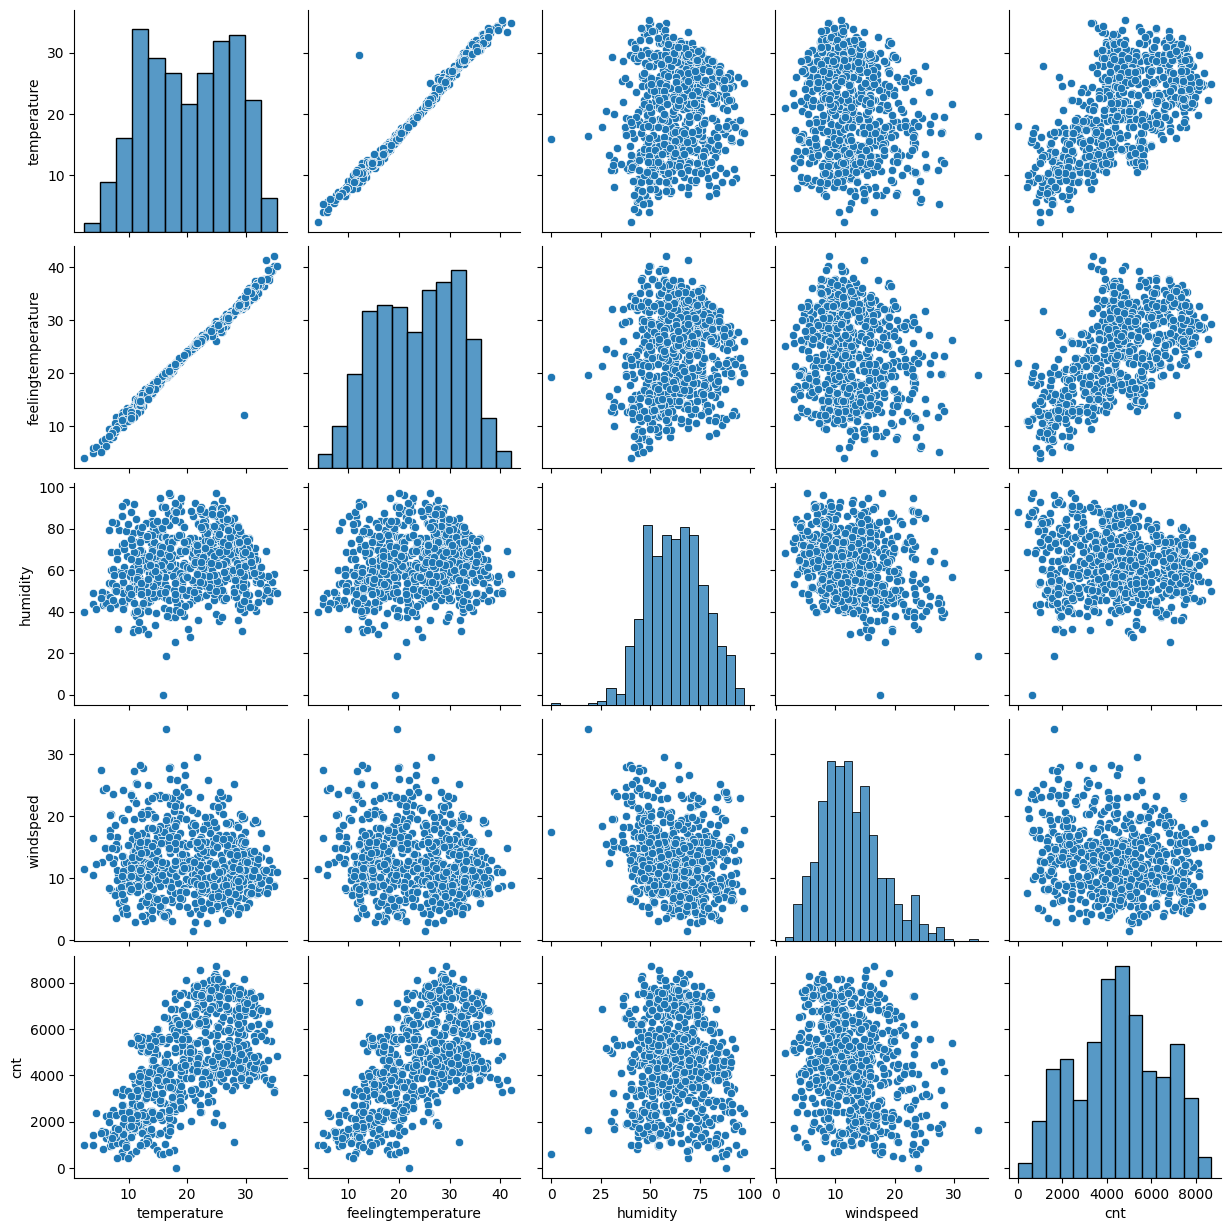

In [33]:
plt.figure(figsize = (10,10))
sns.pairplot(data=bike_dataframe,vars=['temperature', 'feelingtemperature', 'humidity','windspeed', 'cnt'])
plt.show()

#### Inference: It can be clearly seen that there is a Linear Relation between 'temperature','feelingtemperature' and 'cnt' with the help of above pair-plots.

### Heatmap for correlation

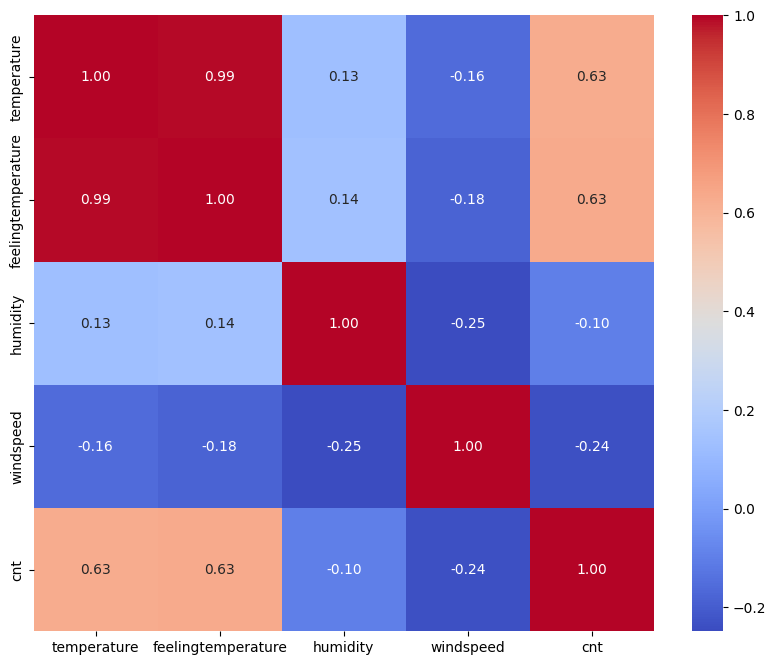

In [34]:
# Select the columns for the heatmap
selected_columns = bike_dataframe[['temperature', 'feelingtemperature', 'humidity','windspeed', 'cnt']]
# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()
# Set the size of the figure
plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Show the plot
plt.show()

#### Inference: The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

#### Visualising Categorical Variables

Let's make a boxplot for some of the categorical columns

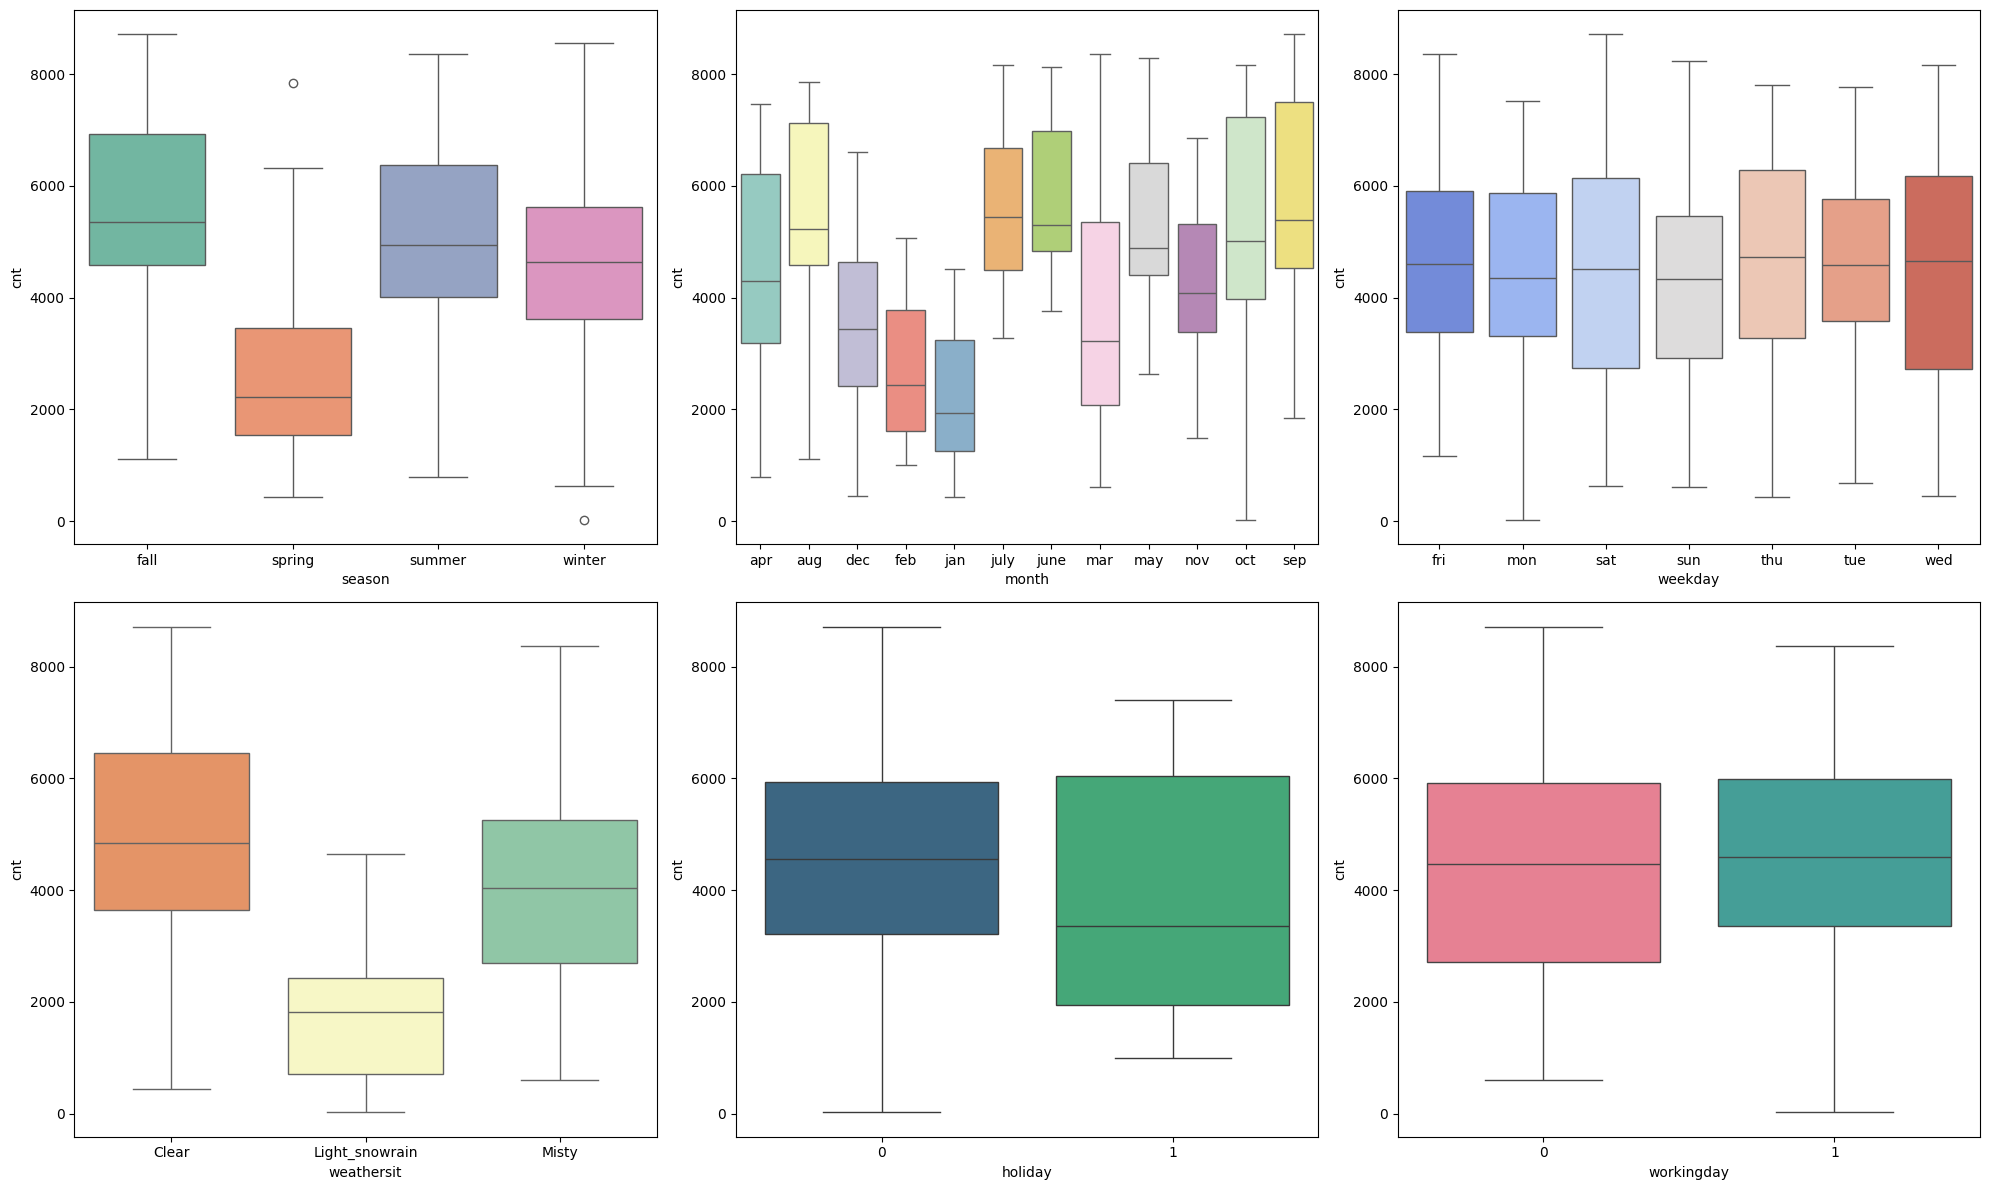

In [35]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot 1: Boxplot for 'season' with color palette
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_dataframe, palette='Set2')  # Using 'Set2' palette

# Plot 2: Boxplot for 'month' with color palette
plt.subplot(2, 3, 2)
sns.boxplot(x='month', y='cnt', data=bike_dataframe, palette='Set3')  # Using 'Set3' palette

# Plot 3: Boxplot for 'weekday' with color palette
plt.subplot(2, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_dataframe, palette='coolwarm')  # Using 'coolwarm' palette

# Plot 4: Boxplot for 'weathersit' with color palette
plt.subplot(2, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_dataframe, palette='Spectral')  # Using 'Spectral' palette

# Plot 5: Boxplot for 'holiday' with color palette
plt.subplot(2, 3, 5)
sns.boxplot(x='holiday', y='cnt', data=bike_dataframe, palette='viridis')  # Using 'viridis' palette

# Plot 6: Boxplot for 'workingday' with color palette
plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_dataframe, palette='husl')  # Using 'husl' palette

# Show the plots
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

### Inference: 

**season**: Most of the bike booking happened in fall season. It was followed by summer and winter.
This indicates, season can be a good predictor for the dependent variable.

**month**: Most of the bike booking happened in the months May, June, July, August, September and October. This indicates that Month has some trend for bookings and can be a good predictor for the dependent variable.

**weekday**: Wed, Thu, Fir, Sat have more number of bookings as compared to the start of the week and can be a good predictor for the dependent variable.

**weathersit**: Clear weathersit had more number of bookings compared to others. So, it can be a good predictor for the dependent variable.

**holiday**: Almost 97.6% of the bike booking happend on non-holiday day. So, this data can be biased and may not be a good predictor for the dependent variable.

**workingday**: Most of the bike booking happened on workingday.  So, it can be a good predictor for the dependent variable.

In [36]:
# Function to create barplot related to categorical columns
def Categorical_columns_display(column):
    plt.figure(figsize=(10, 6))

    # Plot 1: Bar plot without hue and with a specific color palette
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_dataframe, palette='pastel')  # Using 'pastel' palette

    # Plot 2: Bar plot with hue and different color palette
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_dataframe, hue='year', palette='Set1')

    # Set legend for hue plot
    plt.legend(title='Year', labels=['2018', '2019'])

    plt.show()

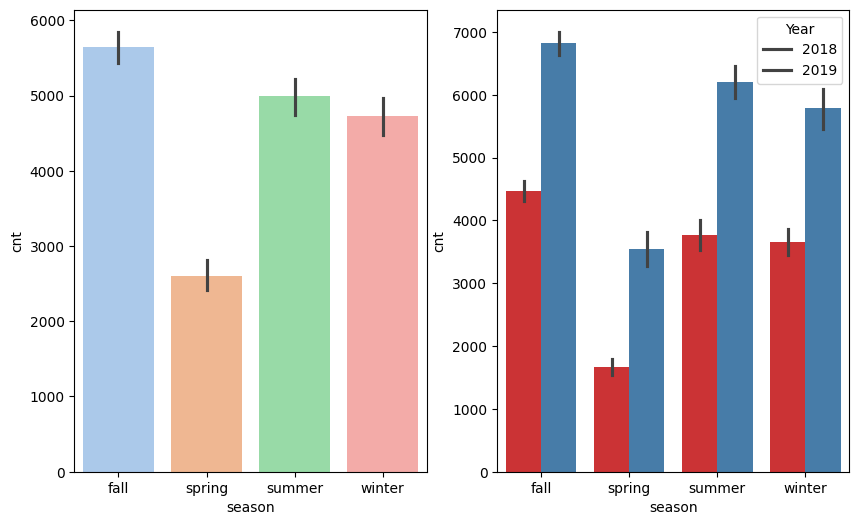

In [37]:
# barplot for season column
Categorical_columns_display('season')

#### Inference: Fall season has got more bookings compared to other seasons and in 2019 more bookings have been made compared to 2018.

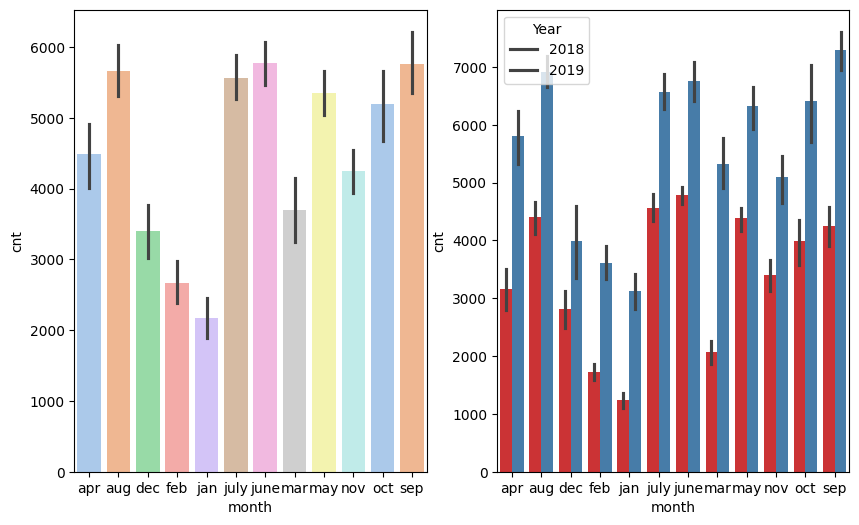

In [38]:
# barplot for month column
Categorical_columns_display('month')

#### Inference: Most of the bookings has been done during the month of may, june, july, aug, sep and oct.

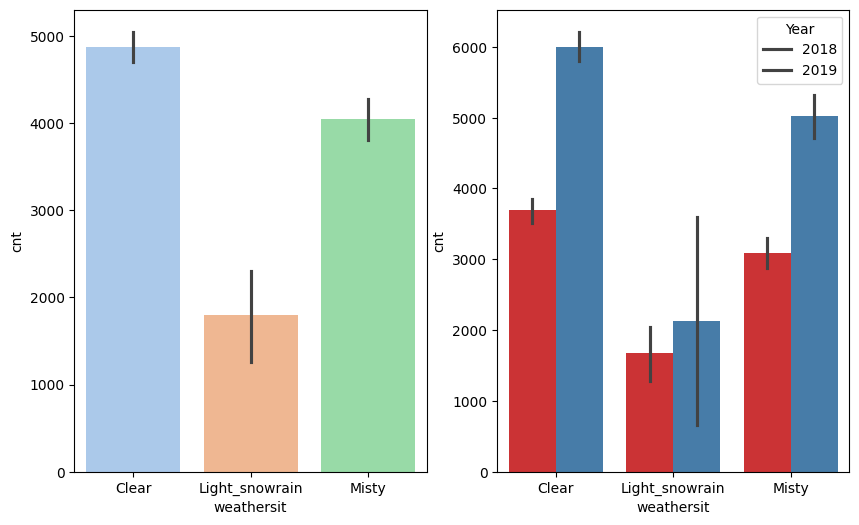

In [39]:
# barplot for weathersit column
Categorical_columns_display('weathersit')

#### Inference: Clear weather has got most bookings. So clearly there is trend.

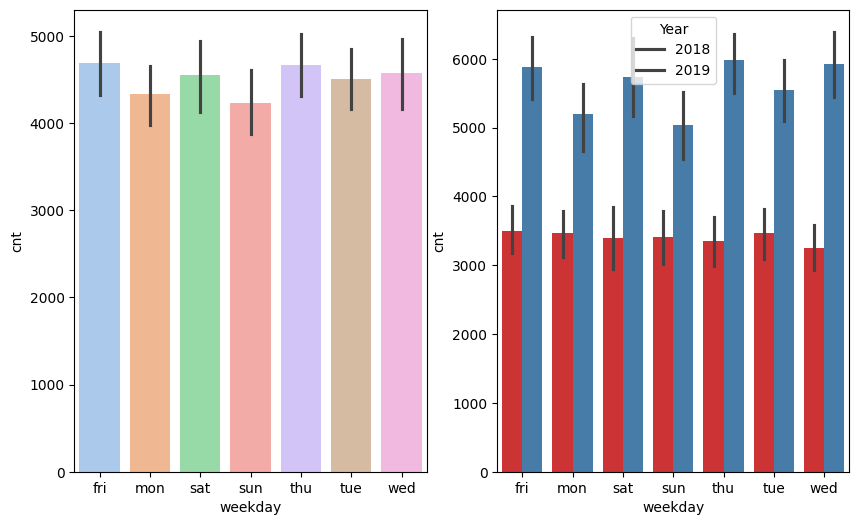

In [40]:
# barplot for weekday column
Categorical_columns_display('weekday')

#### Inference: Wed, Thu, Fir, Sat have more number of bookings as compared to the start of the week and can be a good predictor for the dependent variable.

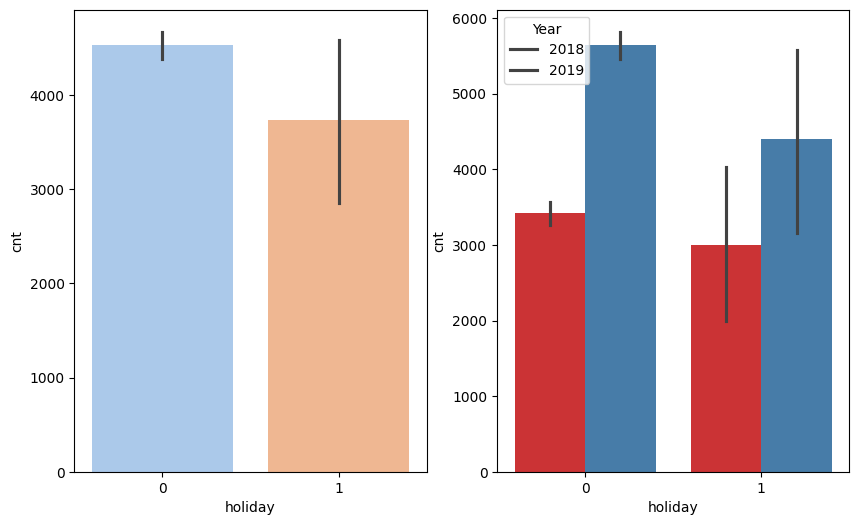

In [41]:
# barplot for holiday column
Categorical_columns_display('holiday')

#### Inference: Almost 97.6% of the bike booking happend on non-holiday day. So, this data can be biased and may not be a good predictor for the dependent variable.

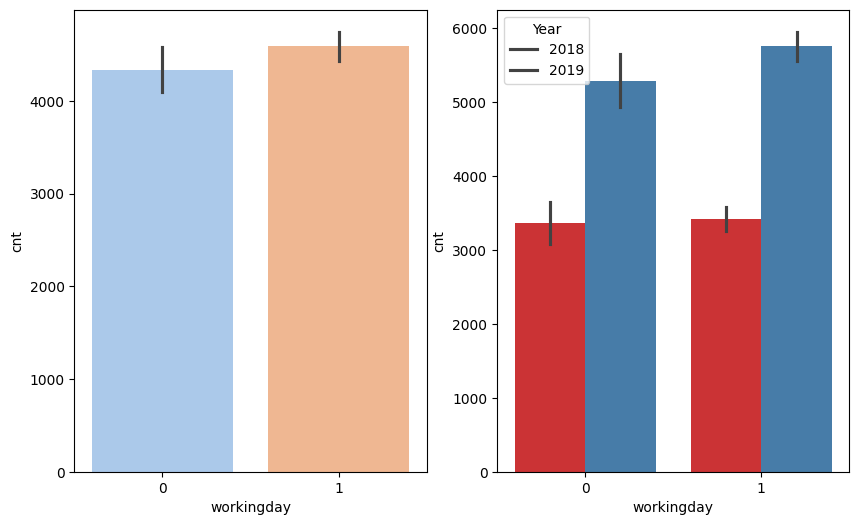

In [42]:
# barplot for workingday column
Categorical_columns_display('workingday')

#### Inference: Most of the bike booking happened on workingday. So, it can be a good predictor for the dependent variable.

## 2. Preparing the data for modelling

In [43]:
# Displaying info 
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   season              730 non-null    category
 1   year                730 non-null    int64   
 2   month               730 non-null    category
 3   holiday             730 non-null    int64   
 4   weekday             730 non-null    category
 5   workingday          730 non-null    int64   
 6   weathersit          730 non-null    category
 7   temperature         730 non-null    float64 
 8   feelingtemperature  730 non-null    float64 
 9   humidity            730 non-null    float64 
 10  windspeed           730 non-null    float64 
 11  cnt                 730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Dummy variable creation

In [44]:
# Dummy variable creation for month, weekday, weathersit and season variables.
seasons_dataframe = pd.get_dummies(bike_dataframe.season,drop_first=True)
months_dataframe = pd.get_dummies(bike_dataframe.month,drop_first=True)
weekdays_dataframe = pd.get_dummies(bike_dataframe.weekday,drop_first=True)
weathersit_dataframe = pd.get_dummies(bike_dataframe.weathersit,drop_first=True)

#### Merging the dataframe to create a new dataframe

In [45]:
# Merging the dataframe, with the dummy variable dataset.
bike_dataframe_new = pd.concat([bike_dataframe, seasons_dataframe, months_dataframe, weekdays_dataframe, weathersit_dataframe],axis=1)

In [46]:
# Displaying the head of the dataframe
bike_dataframe_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,False,False,False,True,False,False,False,False,False,True
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,False,False,False,True,False,False,False,False,True
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,True,False,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [47]:
# Displaying the info
bike_dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   season              730 non-null    category
 1   year                730 non-null    int64   
 2   month               730 non-null    category
 3   holiday             730 non-null    int64   
 4   weekday             730 non-null    category
 5   workingday          730 non-null    int64   
 6   weathersit          730 non-null    category
 7   temperature         730 non-null    float64 
 8   feelingtemperature  730 non-null    float64 
 9   humidity            730 non-null    float64 
 10  windspeed           730 non-null    float64 
 11  cnt                 730 non-null    int64   
 12  spring              730 non-null    bool    
 13  summer              730 non-null    bool    
 14  winter              730 non-null    bool    
 15  aug                 730 non-null    bool

In [48]:
# Convert all boolean columns to uint8
bool_columns = bike_dataframe_new.select_dtypes(include='bool').columns
bike_dataframe_new[bool_columns] = bike_dataframe_new[bool_columns].astype('uint8')

In [49]:
# Displaying the info
bike_dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   season              730 non-null    category
 1   year                730 non-null    int64   
 2   month               730 non-null    category
 3   holiday             730 non-null    int64   
 4   weekday             730 non-null    category
 5   workingday          730 non-null    int64   
 6   weathersit          730 non-null    category
 7   temperature         730 non-null    float64 
 8   feelingtemperature  730 non-null    float64 
 9   humidity            730 non-null    float64 
 10  windspeed           730 non-null    float64 
 11  cnt                 730 non-null    int64   
 12  spring              730 non-null    uint8   
 13  summer              730 non-null    uint8   
 14  winter              730 non-null    uint8   
 15  aug                 730 non-null    uint

In [50]:
# dropping unnecessary columns as we have already created dummy variable out of it.
bike_dataframe_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [51]:
# Displaying info after removing unwanted columns 
bike_dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temperature         730 non-null    float64
 4   feelingtemperature  730 non-null    float64
 5   humidity            730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   spring              730 non-null    uint8  
 9   summer              730 non-null    uint8  
 10  winter              730 non-null    uint8  
 11  aug                 730 non-null    uint8  
 12  dec                 730 non-null    uint8  
 13  feb                 730 non-null    uint8  
 14  jan                 730 non-null    uint8  
 15  july                730 non-null    uint8  
 16  june    

In [52]:
# Displaying the head
bike_dataframe_new.head()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 3. Training the model

#### Splitting the Data into Training and Testing Sets

In [53]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_dataframe_new, train_size = 0.8, test_size = 0.2, random_state = 42)

In [54]:
# check the shape of training datatset
df_train.shape

(584, 30)

In [55]:
# check the shape of testing datatset
df_test.shape

(146, 30)

In [56]:
bike_dataframe_new.shape

(730, 30)

#### Rescaling the features using Min-Max scaling

In [57]:
# Checking the values before scaling
df_train.head()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
247,0,1,0,27.606653,31.28230,79.0417,14.250632,3351,0,0,...,0,1,1,0,0,0,0,0,0,1
335,0,0,1,12.880847,16.57165,62.5833,6.750518,3940,0,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,1,0,0,0
440,1,0,0,21.080847,25.25230,75.5833,7.417168,7836,1,0,...,0,0,0,1,0,0,0,0,0,1
136,0,0,1,23.028347,26.92645,83.7917,18.582718,4123,0,1,...,0,0,0,0,0,0,1,0,0,1


In [58]:
scaler = MinMaxScaler()

In [59]:
# Apply scaler() to all the numeric variables
num_vars = ['temperature', 'feelingtemperature', 'humidity', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:

# Checking values after scaling
df_train.head()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
247,0,1,0,0.765327,0.717455,0.814513,0.475900,0.382996,0,0,...,0,1,1,0,0,0,0,0,0,1
335,0,0,1,0.317788,0.331261,0.644911,0.195963,0.450759,0,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,0.757478,0,0,...,0,0,0,0,0,0,1,0,0,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,0.898988,1,0,...,0,0,0,1,0,0,0,0,0,1
136,0,0,1,0.626185,0.603102,0.863461,0.637592,0.471813,0,1,...,0,0,0,0,0,0,1,0,0,1


In [61]:
df_train.describe()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.551484,0.527193,0.654151,0.410017,0.520520,0.229452,0.250000,...,0.095890,0.085616,0.147260,0.143836,0.150685,0.147260,0.138699,0.138699,0.032534,0.344178
std,0.500285,0.177566,0.469540,0.227249,0.212483,0.146644,0.187249,0.224926,0.420841,0.433384,...,0.294693,0.280037,0.354669,0.351224,0.358048,0.354669,0.345928,0.345928,0.177566,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354266,0.353829,0.542745,0.276424,0.371088,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.558730,0.657578,0.379465,0.523527,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745598,0.698392,0.757346,0.520978,0.691872,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


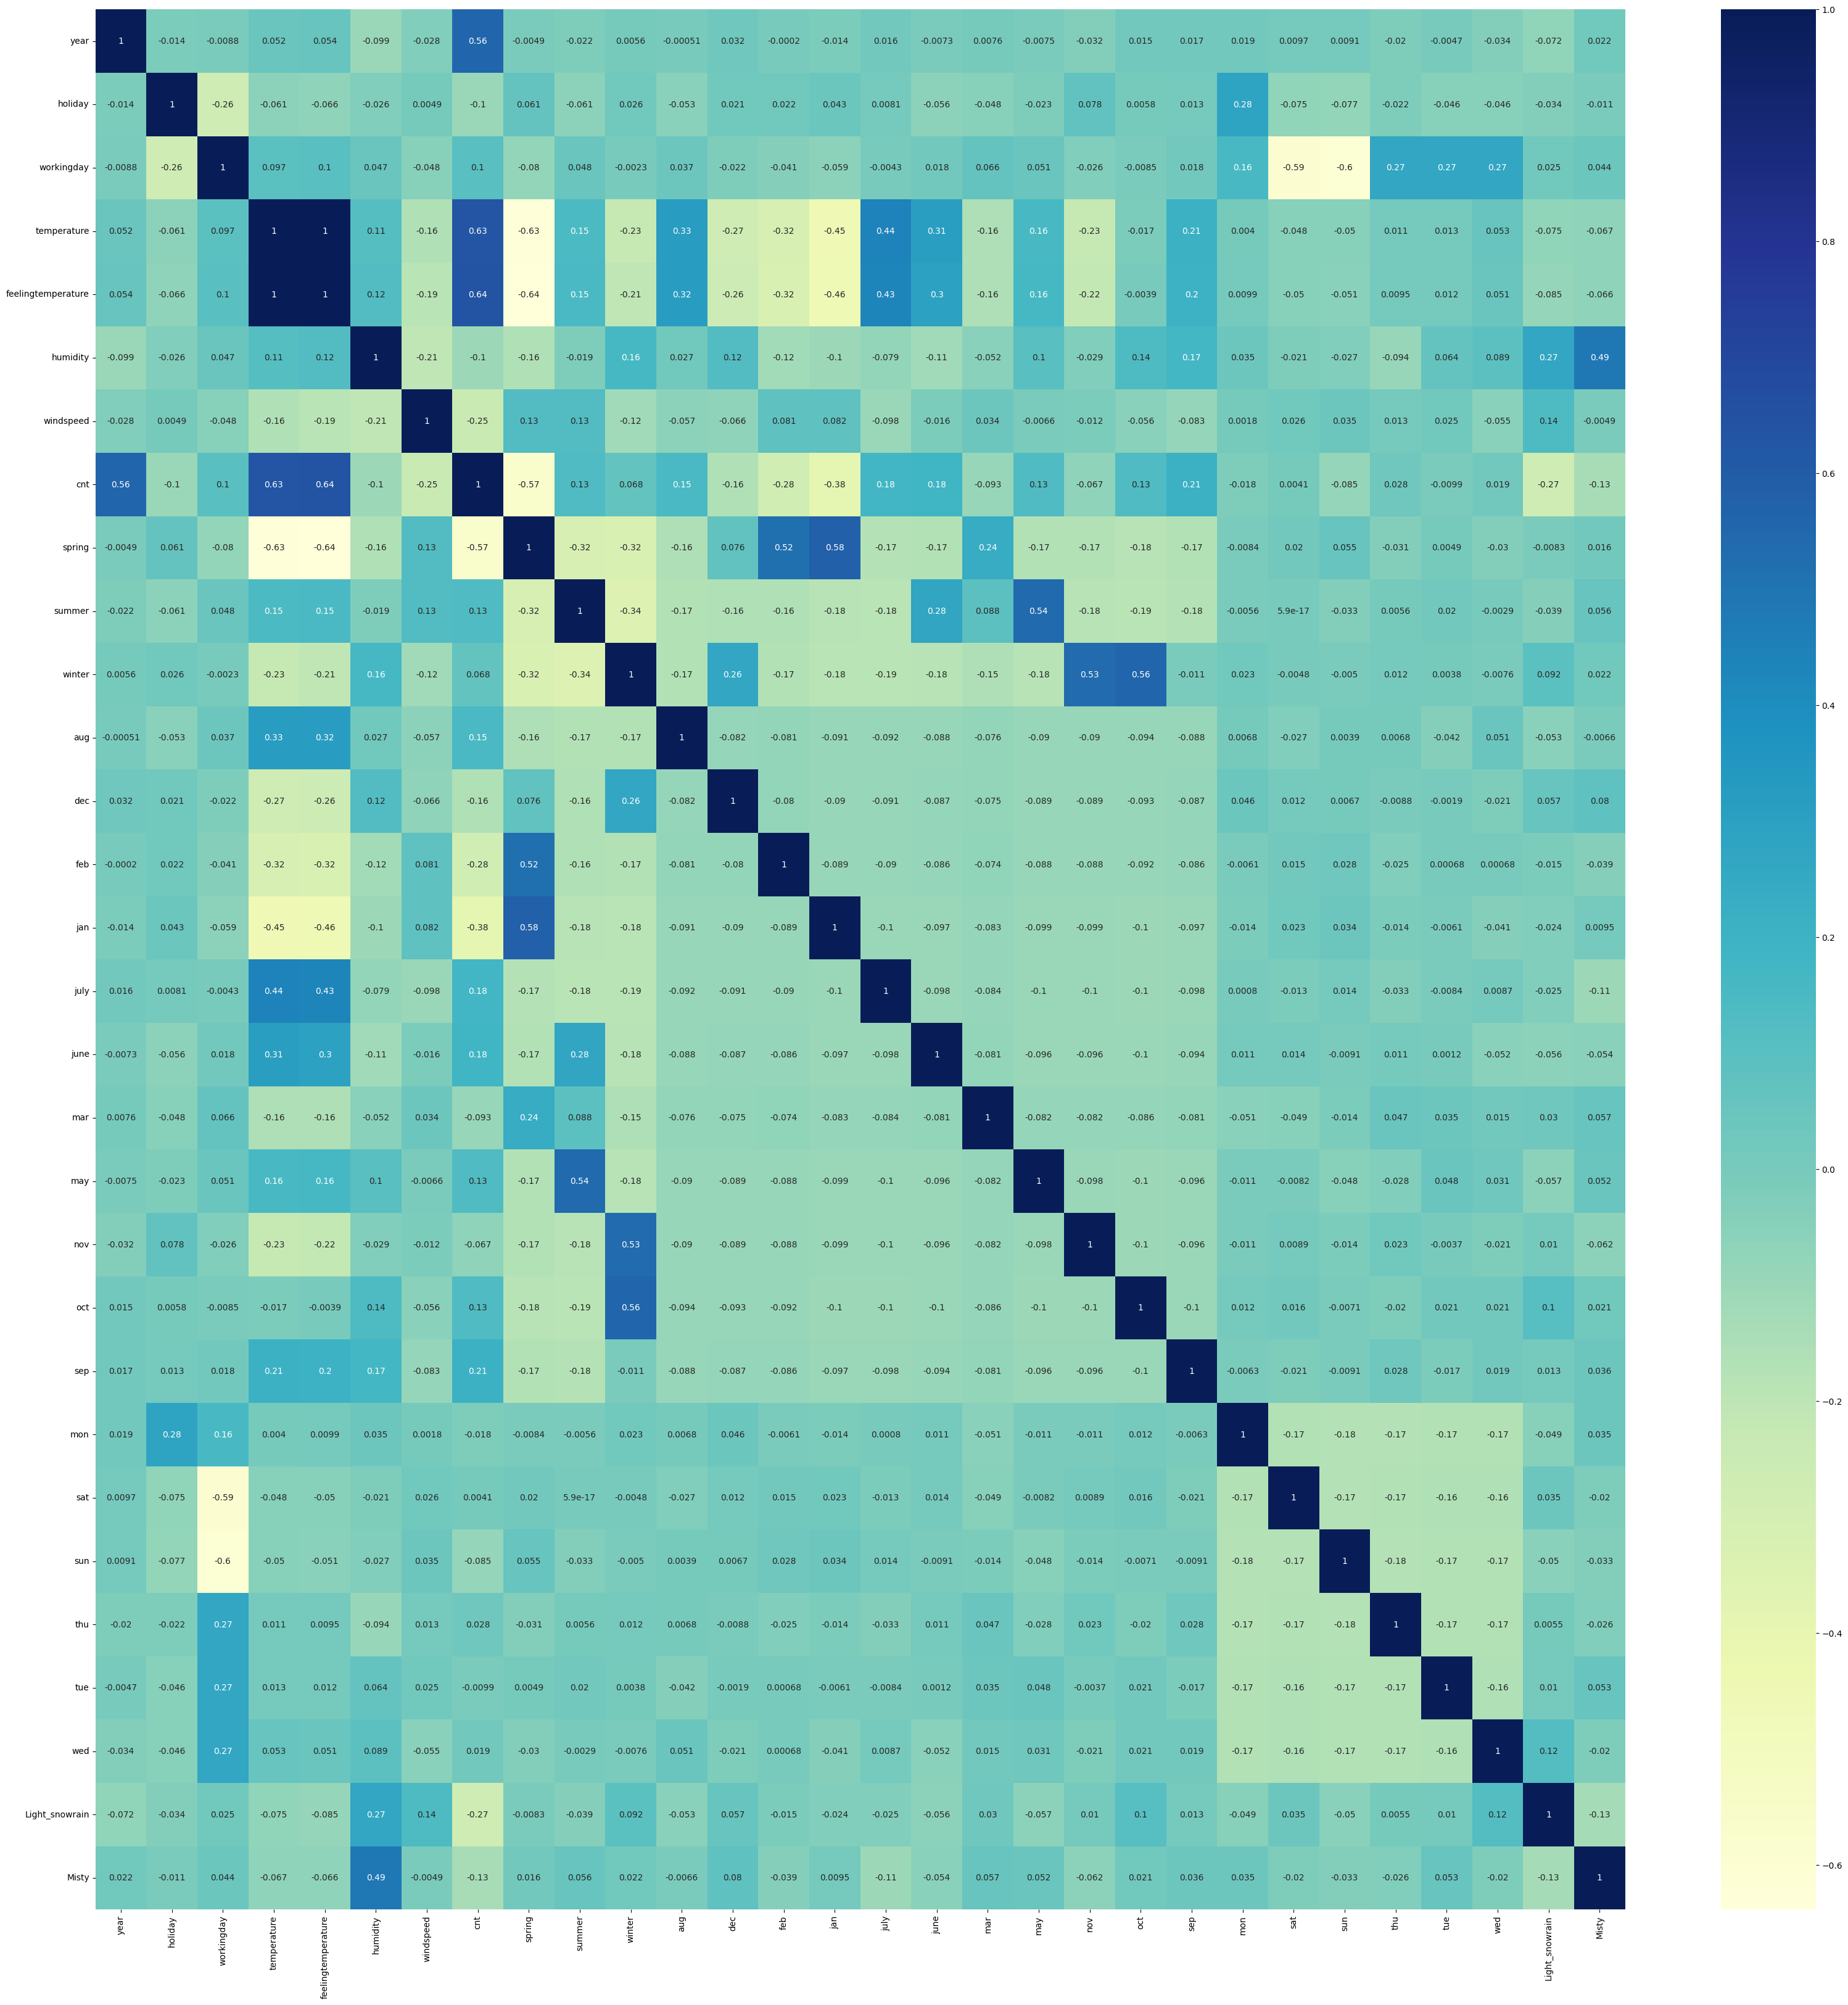

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inference: There seems to be correlation between cnt and temperature, feelingtemperature.

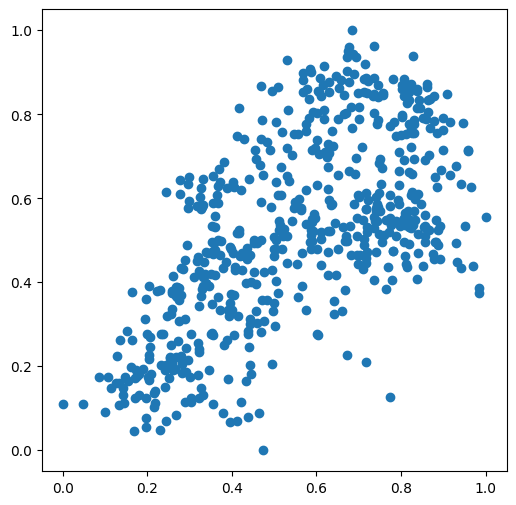

In [63]:
# Lets see trends via Scatter plot between cnt vs temperature

plt.figure(figsize=[6,6])
plt.scatter(df_train.temperature, df_train.cnt)
plt.show()

#### Inference: Scatter plot confirms the positive correlation between temperature and cnt.

In [64]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

#### Building a linear model

#### Recursive feature elimination(RFE)

In [65]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()

lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [66]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 2),
 ('temperature', True, 1),
 ('feelingtemperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('aug', False, 11),
 ('dec', True, 1),
 ('feb', False, 13),
 ('jan', False, 9),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', True, 1),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 15),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [67]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'temperature', 'feelingtemperature', 'humidity', 'windspeed',
       'spring', 'winter', 'dec', 'july', 'mar', 'nov', 'sep', 'sat',
       'Light_snowrain', 'Misty'],
      dtype='object')


In [68]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'aug', 'feb', 'jan', 'june', 'may',
       'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### Model 1

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,feelingtemperature,1254.04
1,temperature,1220.69
3,humidity,25.94
4,windspeed,5.19
6,winter,2.84
5,spring,2.64
14,Misty,2.30
0,year,2.08
10,nov,1.78
8,july,1.51


In [71]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [72]:
# Check the parameters obtained

lr1.params

const                 0.365264
year                  0.226532
temperature           0.098275
feelingtemperature    0.355291
humidity             -0.164003
windspeed            -0.130000
spring               -0.144009
winter                0.083390
dec                  -0.058545
july                 -0.059428
mar                   0.051220
nov                  -0.079209
sep                   0.052686
sat                   0.023340
Light_snowrain       -0.230548
Misty                -0.048284
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.18e-209
Time:                        09:49:17   Log-Likelihood:                 566.67
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     568   BIC:                            -1031.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3653      0

#### Model 2

In [74]:
# As feelingtemperature shows high VIF values hence we can drop it
X_train_new_2 = X_train_rfe.drop(['feelingtemperature'], axis = 1)

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,24.29
1,temperature,16.82
3,windspeed,4.94
5,winter,2.79
4,spring,2.64
13,Misty,2.26
0,year,2.07
9,nov,1.78
7,july,1.50
6,dec,1.40


In [76]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new_2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [77]:
# Check the parameters obtained

lr2.params

const             0.369666
year              0.226976
temperature       0.427661
humidity         -0.156152
windspeed        -0.137914
spring           -0.145560
winter            0.085392
dec              -0.058355
july             -0.060518
mar               0.052695
nov              -0.079703
sep               0.049878
sat               0.023205
Light_snowrain   -0.236463
Misty            -0.049831
dtype: float64

In [78]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.40e-210
Time:                        09:49:17   Log-Likelihood:                 565.55
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     569   BIC:                            -1036.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3697      0.033     11.

#### Model 3

In [79]:
# As humidity shows high VIF values hence we can drop it
X_train_new_3 = X_train_new_2.drop(['humidity'], axis = 1)

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temperature,5.44
2,windspeed,4.89
4,winter,2.38
0,year,2.06
3,spring,1.76
8,nov,1.74
12,Misty,1.56
6,july,1.45
5,dec,1.34
9,sep,1.22


In [81]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [82]:
lr3.params

const             0.281327
year              0.231841
temperature       0.402482
windspeed        -0.112654
spring           -0.148693
winter            0.078514
dec              -0.064634
july             -0.052895
mar               0.056095
nov              -0.079049
sep               0.043243
sat               0.023729
Light_snowrain   -0.283173
Misty            -0.075384
dtype: float64

In [83]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.28e-207
Time:                        09:49:18   Log-Likelihood:                 556.30
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     570   BIC:                            -1023.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2813      0.026     10.

#### Model 4

In [84]:
# As july shows high p-value we can drop it
X_train_new_4 = X_train_new_3.drop(['july'], axis = 1)

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.77
1,temperature,4.29
4,winter,2.33
0,year,2.06
3,spring,1.76
7,nov,1.74
11,Misty,1.55
5,dec,1.34
8,sep,1.17
9,sat,1.17


In [86]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [87]:
lr4.params

const             0.296199
year              0.232056
temperature       0.363133
windspeed        -0.108757
spring           -0.154687
winter            0.081183
dec              -0.068109
mar               0.058714
nov              -0.083364
sep               0.053361
sat               0.023581
Light_snowrain   -0.285320
Misty            -0.073571
dtype: float64

In [88]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     222.9
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.27e-206
Time:                        09:49:18   Log-Likelihood:                 550.54
No. Observations:                 584   AIC:                            -1075.
Df Residuals:                     571   BIC:                            -1018.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2962      0.026     11.

#### Model 5

In [89]:
# As sat shows high p-value we can drop it
X_train_new_5 = X_train_new_4.drop(['sat'], axis = 1)

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.75
1,temperature,4.26
4,winter,2.33
0,year,2.06
3,spring,1.75
7,nov,1.74
10,Misty,1.55
5,dec,1.34
8,sep,1.17
6,mar,1.16


In [91]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [92]:
lr5.params

const             0.301784
year              0.232357
temperature       0.359822
windspeed        -0.108451
spring           -0.155489
winter            0.080231
dec              -0.068175
mar               0.056602
nov              -0.083340
sep               0.052946
Light_snowrain   -0.283793
Misty            -0.073843
dtype: float64

In [93]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.24e-206
Time:                        09:49:18   Log-Likelihood:                 548.32
No. Observations:                 584   AIC:                            -1073.
Df Residuals:                     572   BIC:                            -1020.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3018      0.026     11.

#### Model 6

In [94]:
# As mar shows high p-value we can drop it
X_train_new_6 = X_train_new_5.drop(['mar'], axis = 1)

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.74
1,temperature,4.26
4,winter,2.32
0,year,2.06
6,nov,1.74
3,spring,1.67
9,Misty,1.54
5,dec,1.33
7,sep,1.17
8,Light_snowrain,1.10


In [96]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new_6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [97]:
lr6.params

const             0.311399
year              0.232930
temperature       0.350868
windspeed        -0.111020
spring           -0.152028
winter            0.076809
dec              -0.074212
nov              -0.085910
sep               0.050187
Light_snowrain   -0.279698
Misty            -0.072009
dtype: float64

In [98]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.07e-205
Time:                        09:49:18   Log-Likelihood:                 542.56
No. Observations:                 584   AIC:                            -1063.
Df Residuals:                     573   BIC:                            -1015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3114      0.026     12.

#### Model 7

In [99]:
# As sep shows high p-value we can drop it
X_train_new_7 = X_train_new_6.drop(['sep'], axis = 1)

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.73
1,temperature,4.08
4,winter,2.31
0,year,2.06
6,nov,1.72
3,spring,1.67
8,Misty,1.54
5,dec,1.33
7,Light_snowrain,1.10


In [101]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new_7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [102]:
lr7.params

const             0.313567
year              0.233184
temperature       0.358288
windspeed        -0.115319
spring           -0.154570
winter            0.079130
dec              -0.078991
nov              -0.092116
Light_snowrain   -0.276843
Misty            -0.070611
dtype: float64

In [103]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.64e-204
Time:                        09:49:18   Log-Likelihood:                 536.72
No. Observations:                 584   AIC:                            -1053.
Df Residuals:                     574   BIC:                            -1010.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3136      0.026     12.

#### We can cosider lr7 model as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.


## 4. Residual analysis

In [104]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

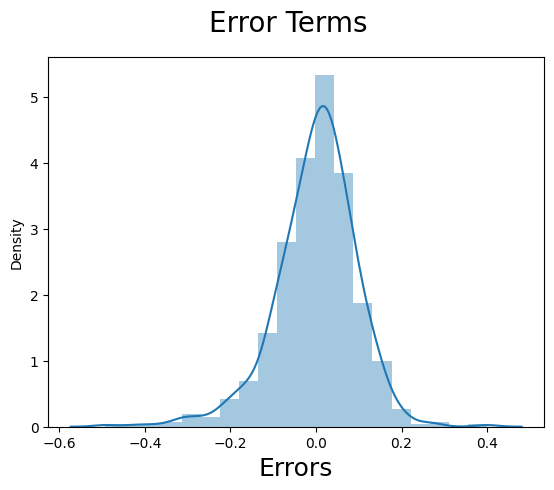

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### Multi Colinearity

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.73
1,temperature,4.08
4,winter,2.31
0,year,2.06
6,nov,1.72
3,spring,1.67
8,Misty,1.54
5,dec,1.33
7,Light_snowrain,1.10


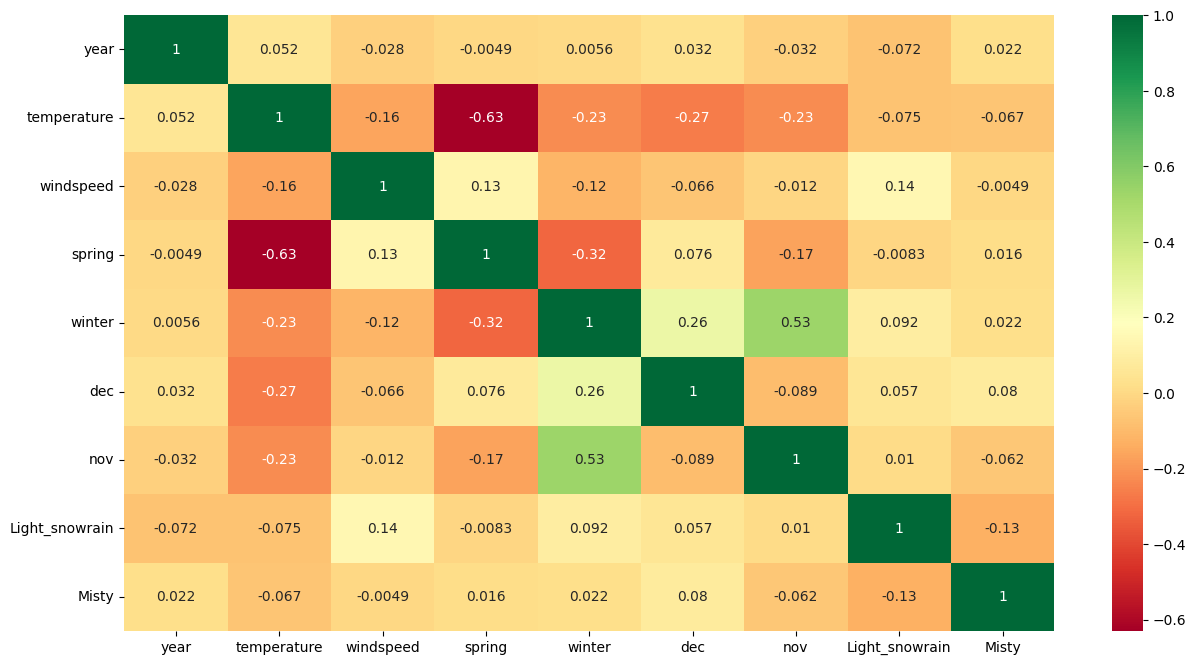

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new_7.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### VIF values are less than 5 and there is no multicolinearity as seen from the heatmap.

#### Linearity 

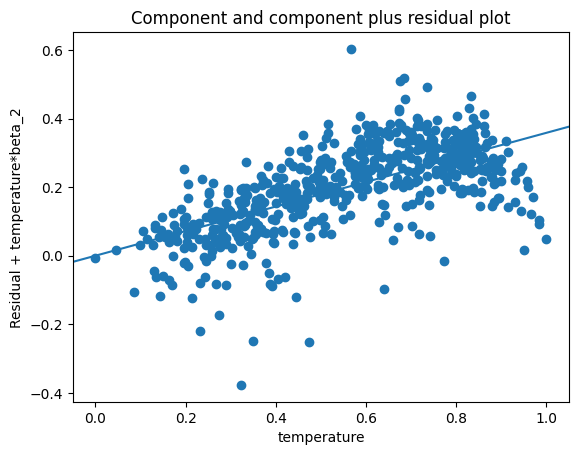

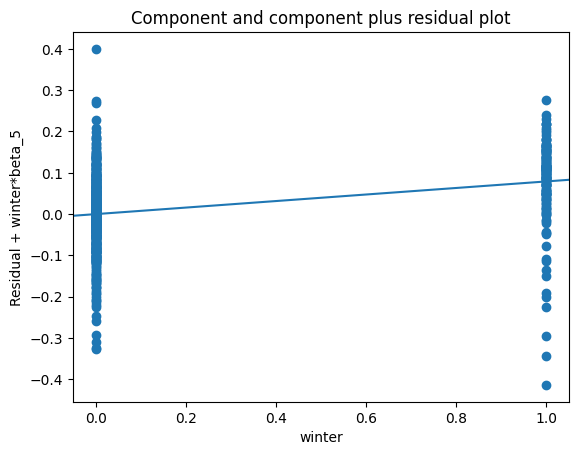

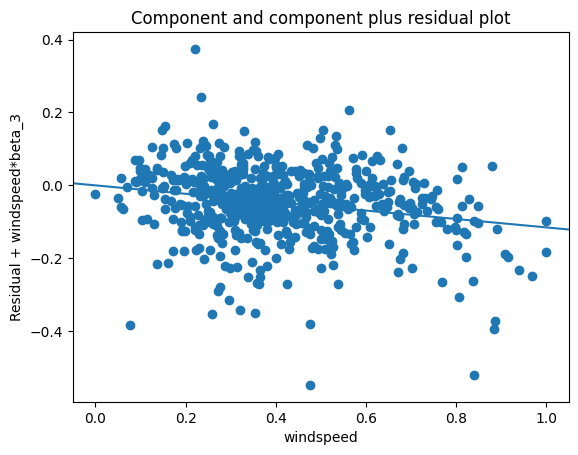

In [108]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr7, 'temperature')
plt.show()

sm.graphics.plot_ccpr(lr7, 'winter')
plt.show()

sm.graphics.plot_ccpr(lr7, 'windspeed')
plt.show()

#### Linearity can be observed from above visualizations.

#### Homoscedasticity

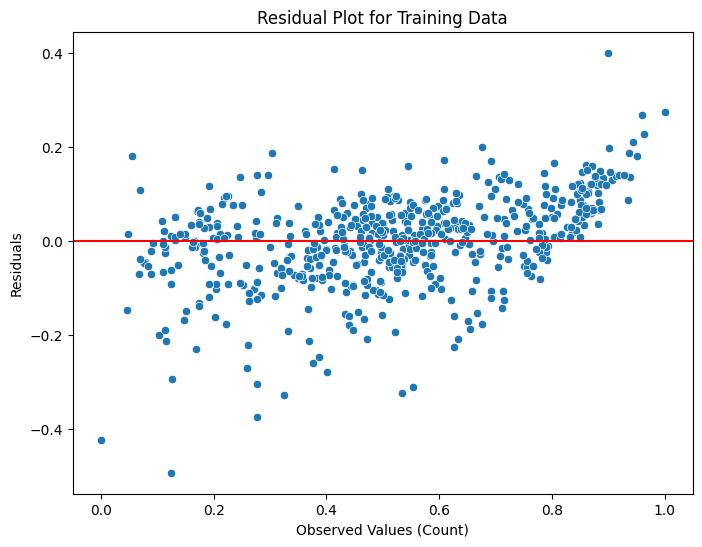

In [109]:
y_train_pred = lr7.predict(X_train_lm7)  # Predicted values on the training set
residual = y_train - y_train_pred  # Calculate residuals

# Plotting the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=residual)  # Explicitly mention x and y arguments
plt.axhline(0, color='red', linestyle='-')  # Add a horizontal line at zero

# Adding labels and title
plt.xlabel('Observed Values (Count)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Training Data')
plt.show()

#### No visible pattern observed from above plot for residuals.
Durbin-Watson statistic of 2.021 is very close to 2, suggesting that there is no significant

## 5. Predictions and evaluations

In [110]:
# Applying scaling on the test dataset
num_vars = ['temperature', 'feelingtemperature', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
468,1,0,0,0.543115,0.536771,0.518248,0.421436,0.855729,0,1,...,0,0,0,1,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479005,0.548320,0,1,...,0,0,0,0,1,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.385676,0.380695,0,0,...,1,0,0,0,1,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062226,0.350437,1,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.432344,0.841694,0,1,...,0,0,0,0,0,1,0,0,0,0


In [111]:
df_test.describe()

,year,holiday,workingday,temperature,feelingtemperature,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.452055,0.013699,0.726027,0.513327,0.486680,0.617324,0.461923,0.498457,0.315068,0.260274,...,0.041096,0.068493,0.130137,0.143836,0.116438,0.123288,0.157534,0.150685,0.013699,0.308219
std,0.499409,0.116637,0.447530,0.229925,0.217533,0.143761,0.214336,0.213583,0.466142,0.440294,...,0.199195,0.253460,0.337612,0.352131,0.321854,0.329899,0.365558,0.358973,0.116637,0.463347
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.062226,0.142775,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.317742,0.306197,0.516316,0.294317,0.310084,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.483409,0.471301,0.601975,0.445562,0.503164,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.723272,0.677047,0.714815,0.547829,0.665526,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.960541,0.939531,1.002146,1.213032,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 468 to 260
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                146 non-null    int64  
 1   holiday             146 non-null    int64  
 2   workingday          146 non-null    int64  
 3   temperature         146 non-null    float64
 4   feelingtemperature  146 non-null    float64
 5   humidity            146 non-null    float64
 6   windspeed           146 non-null    float64
 7   spring              146 non-null    uint8  
 8   summer              146 non-null    uint8  
 9   winter              146 non-null    uint8  
 10  aug                 146 non-null    uint8  
 11  dec                 146 non-null    uint8  
 12  feb                 146 non-null    uint8  
 13  jan                 146 non-null    uint8  
 14  july                146 non-null    uint8  
 15  june                146 non-null    uint8  
 16  mar        

In [113]:
#Selecting the variables that were part of final model.
col1=X_train_new_7.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 468 to 260
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           146 non-null    float64
 1   year            146 non-null    int64  
 2   temperature     146 non-null    float64
 3   windspeed       146 non-null    float64
 4   spring          146 non-null    uint8  
 5   winter          146 non-null    uint8  
 6   dec             146 non-null    uint8  
 7   nov             146 non-null    uint8  
 8   Light_snowrain  146 non-null    uint8  
 9   Misty           146 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 6.6 KB


In [114]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

In [115]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8313

#### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

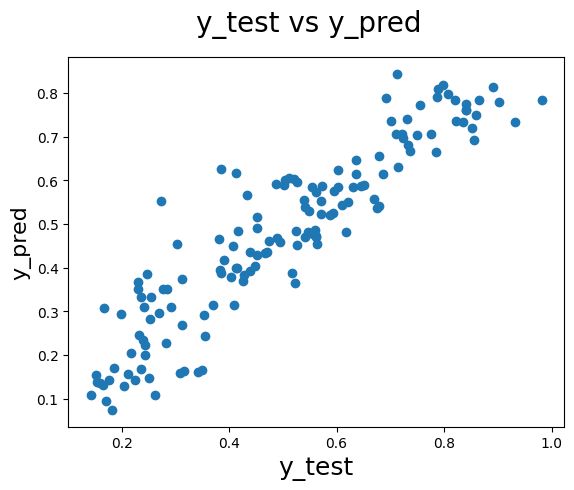

In [116]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [117]:
round(lr7.params,4)

const             0.3136
year              0.2332
temperature       0.3583
windspeed        -0.1153
spring           -0.1546
winter            0.0791
dec              -0.0790
nov              -0.0921
Light_snowrain   -0.2768
Misty            -0.0706
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.3136 + (0.2332  \times  year) + (0.3583  \times  temperature) - (0.1153 \times windspeed) - (0.1546 \times spring) + (0.0791 \times winter) - (0.0790 \times dec) - (0.0921\times nov) - (0.2768 \times Light_snowrain) - (0.0706 \times Misty) $

## R-squared score

#### R^2 Value for TEST

In [118]:
r2_score(y_test, y_pred)

0.8312575787097936

#### Adjusted R^2 Value for TEST

In [119]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8201


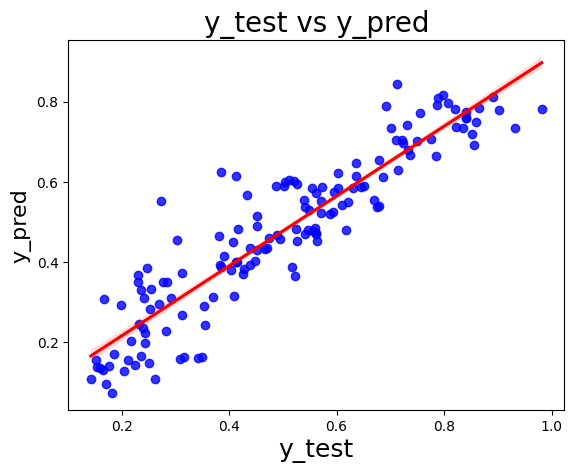

In [120]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Final Result Comparison
- Train R^2 : 0.816
- Train Adjusted R^2 : 0.813
- Test R^2 : 0.831
- Test Adjusted R^2 : 0.820
- This seems to be a really good model that can very well 'Generalize' various datasets.

#### As per our final Model, the top predictor variables that influences the bike booking are:

- Temperature (temp) 
- Year (yr)
- windspeed
- Season (winter, spring)
- month(November, December)
- weathersit( Light_snowrain , Misty)